In [1]:
import pandas as pd
import janitor
import gc
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
state_demographic = pd.read_parquet('VM2--CA--2022-04-25-DEMOGRAPHIC_selected_cols.parquet')

In [3]:
state_demographic.head(5)

,LALVOTERID,Residence_Addresses_City,Voters_Gender,Voters_Age,Parties_Description,EthnicGroups_EthnicGroup1Desc,Voters_OfficialRegDate,County,CommercialData_Education,CommercialData_EstimatedHHIncome,FECDonors_NumberOfDonations,FECDonors_TotalDonationsAmount
0,LALCA453164106,Oakland,F,29,Democratic,Other,06/18/2021,ALAMEDA,None,None,None,None
1,LALCA453008306,Oakland,F,26,Non-Partisan,Likely African-American,04/01/2021,ALAMEDA,None,None,None,None
2,LALCA22129469,Oakland,F,47,Democratic,European,11/16/2021,ALAMEDA,HS Diploma - Extremely Likely,None,None,None
3,LALCA549803906,Oakland,M,60,Democratic,Other,02/07/2022,ALAMEDA,None,None,None,None
4,LALCA24729024,San Leandro,F,56,Democratic,European,02/28/2016,ALAMEDA,HS Diploma - Extremely Likely,None,None,None


In [4]:
#define continuous variables
continuous_vars = ['Voters_Age', 
                   'FECDonors_NumberOfDonations',
                   'FECDonors_TotalDonationsAmount']

#for each continuous var change dtype to numeric and fill nan's with zeros
for col_name in continuous_vars:
    state_demographic[col_name] = pd.to_numeric(state_demographic[col_name])
    state_demographic[col_name].fillna(0, inplace=True)

state_demographic.head()

,LALVOTERID,Residence_Addresses_City,Voters_Gender,Voters_Age,Parties_Description,EthnicGroups_EthnicGroup1Desc,Voters_OfficialRegDate,County,CommercialData_Education,CommercialData_EstimatedHHIncome,FECDonors_NumberOfDonations,FECDonors_TotalDonationsAmount
0,LALCA453164106,Oakland,F,29.0,Democratic,Other,06/18/2021,ALAMEDA,None,None,0.0,0.0
1,LALCA453008306,Oakland,F,26.0,Non-Partisan,Likely African-American,04/01/2021,ALAMEDA,None,None,0.0,0.0
2,LALCA22129469,Oakland,F,47.0,Democratic,European,11/16/2021,ALAMEDA,HS Diploma - Extremely Likely,None,0.0,0.0
3,LALCA549803906,Oakland,M,60.0,Democratic,Other,02/07/2022,ALAMEDA,None,None,0.0,0.0
4,LALCA24729024,San Leandro,F,56.0,Democratic,European,02/28/2016,ALAMEDA,HS Diploma - Extremely Likely,None,0.0,0.0


Text(0.5, 1.0, 'FECDonors_TotalDonationsAmount (nonzero)')

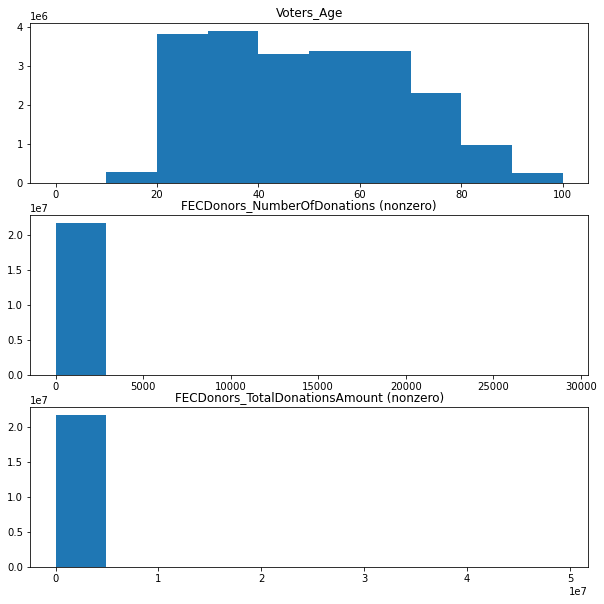

In [8]:
#plot distibutions of continuous variables
fig, axs = plt.subplots(3, figsize=(10, 10))

axs[0].hist(state_demographic['Voters_Age'])
axs[0].set_title('Voters_Age')

axs[1].hist(state_demographic['FECDonors_NumberOfDonations'])
axs[1].set_title('FECDonors_NumberOfDonations (nonzero)')

axs[2].hist(state_demographic['FECDonors_TotalDonationsAmount'])
axs[2].set_title('FECDonors_TotalDonationsAmount (nonzero)')


In [10]:
#create categories for age
state_demographic['Voters_Age_label'] = pd.cut(x=state_demographic['Voters_Age'],
                                         bins=[0, 30, 40, 50, 60, 70, 80, 150],
                                         labels=['>=30','31-40','41-50','51-60', '61-70', '71-80', '80+'])

In [11]:
#since vast majority of voters have zero donations, we will create quantile categories only for non-zero donations
#create lists of non-zero values for FECDonors_NumberOfDonations and FECDonors_TotalDonationsAmount
FECDonors_NumberOfDonations_nonzero = state_demographic['FECDonors_NumberOfDonations'][state_demographic['FECDonors_NumberOfDonations']!=0]
FECDonors_TotalDonationsAmount_nonzero = state_demographic['FECDonors_TotalDonationsAmount'][state_demographic['FECDonors_TotalDonationsAmount']!=0]

In [12]:
#compute quartiles for nonzero number of donations
pd.qcut(FECDonors_NumberOfDonations_nonzero, 4)

18          (18.0, 28970.0]
35              (5.0, 18.0]
38              (5.0, 18.0]
53              (5.0, 18.0]
54          (18.0, 28970.0]
                 ...       
21711091         (2.0, 5.0]
21711128        (5.0, 18.0]
21711336       (0.999, 2.0]
21711352    (18.0, 28970.0]
21711435         (2.0, 5.0]
Name: FECDonors_NumberOfDonations, Length: 697076, dtype: category
Categories (4, interval[float64]): [(0.999, 2.0] < (2.0, 5.0] < (5.0, 18.0] < (18.0, 28970.0]]

In [13]:
#create labels based on quartiles (with separate label for zero donations)
state_demographic['FECDonors_NumberOfDonations_label'] = pd.cut(x=state_demographic['FECDonors_NumberOfDonations'],
                                                               bins=[-1, 0.999, 2, 5, 18, 28970],
                                                               labels=['0','1','2','3','4'])

<AxesSubplot:>

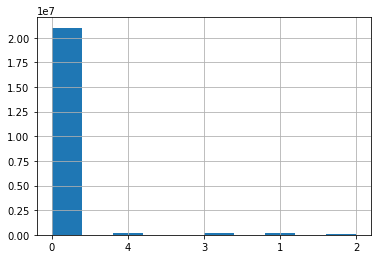

In [14]:
state_demographic['FECDonors_NumberOfDonations_label'].hist()

In [15]:
#compute quartiles for nonzero donation amounts
pd.qcut(FECDonors_TotalDonationsAmount_nonzero, 4)

18          (2000.0, 49293201.0]
35               (574.0, 2000.0]
38          (2000.0, 49293201.0]
53                (0.999, 220.0]
54               (574.0, 2000.0]
                    ...         
21711091          (220.0, 574.0]
21711128          (220.0, 574.0]
21711336          (220.0, 574.0]
21711352         (574.0, 2000.0]
21711435          (0.999, 220.0]
Name: FECDonors_TotalDonationsAmount, Length: 697039, dtype: category
Categories (4, interval[float64]): [(0.999, 220.0] < (220.0, 574.0] < (574.0, 2000.0] < (2000.0, 49293201.0]]

In [16]:
#create labels based on quartiles (with separate label for zero donations)
state_demographic['FECDonors_TotalDonationsAmount_label'] = pd.cut(x=state_demographic['FECDonors_TotalDonationsAmount'],
                                                               bins=[-1, 0.999, 220, 574, 2000, 49293201],
                                                               labels=['0','1','2','3','4'])

<AxesSubplot:>

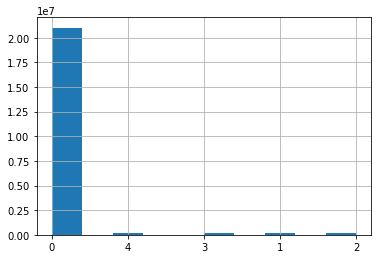

In [17]:
state_demographic['FECDonors_TotalDonationsAmount_label'].hist()

In [18]:
state_demographic.head()

,LALVOTERID,Residence_Addresses_City,Voters_Gender,Voters_Age,Parties_Description,EthnicGroups_EthnicGroup1Desc,Voters_OfficialRegDate,County,CommercialData_Education,CommercialData_EstimatedHHIncome,FECDonors_NumberOfDonations,FECDonors_TotalDonationsAmount,Voters_Age_label,FECDonors_NumberOfDonations_label,FECDonors_TotalDonationsAmount_label
0,LALCA453164106,Oakland,F,29.0,Democratic,Other,06/18/2021,ALAMEDA,None,None,0.0,0.0,>=30,0,0
1,LALCA453008306,Oakland,F,26.0,Non-Partisan,Likely African-American,04/01/2021,ALAMEDA,None,None,0.0,0.0,>=30,0,0
2,LALCA22129469,Oakland,F,47.0,Democratic,European,11/16/2021,ALAMEDA,HS Diploma - Extremely Likely,None,0.0,0.0,41-50,0,0
3,LALCA549803906,Oakland,M,60.0,Democratic,Other,02/07/2022,ALAMEDA,None,None,0.0,0.0,51-60,0,0
4,LALCA24729024,San Leandro,F,56.0,Democratic,European,02/28/2016,ALAMEDA,HS Diploma - Extremely Likely,None,0.0,0.0,51-60,0,0
